In [2]:
%matplotlib inline

In [7]:
import cv2
import dlib
import imutils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from imutils import face_utils
from matplotlib import patches
from io import BytesIO

In [3]:
subscription_key = "34162b79f80a44f58c6629a083929c15"
assert subscription_key
face_api_url = 'https://westus.api.cognitive.microsoft.com/face/v1.0/detect'

In [8]:
import requests
from IPython.display import HTML

all_emotions = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

In [9]:
def annotate_image(image_url):
#     image_file = BytesIO(requests.get(image_url).content)
    headers = {
        'Ocp-Apim-Subscription-Key': subscription_key,
        'Content-type': 'application/octet-stream'
    }

    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
    }
    image = Image.open(image_url)
    with open(image_url, 'rb') as f:
        img_data = f.read()
    response = requests.post(face_api_url, params=params, headers=headers, data=img_data)
    faces = response.json()

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        headPose = fa["headPose"]
        emotions = fa["emotion"]
        emotion = max(emotions, key=lambda key: emotions[key])
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s\n%s"%(emotion.capitalize(), headPose), \
                 fontsize=14, weight="bold", va="bottom")
    plt.axis("off")

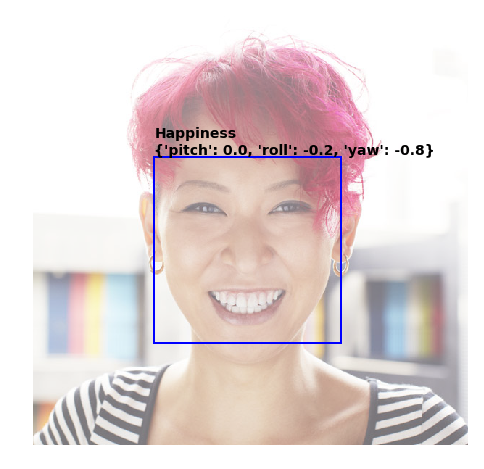

In [10]:
annotate_image("main002.jpg")